# **Setup**

In [1]:
import pandas as pd

# **Data Import**

In [2]:
df_01 = pd.read_csv('LOTR.csv')

print(df_01.shape)
df_01

(4, 3)


,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [3]:
df_02 = pd.read_csv('LOTR 2.csv')

print(df_02.shape)
df_02

(5, 3)


,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


# **Merge Function**

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
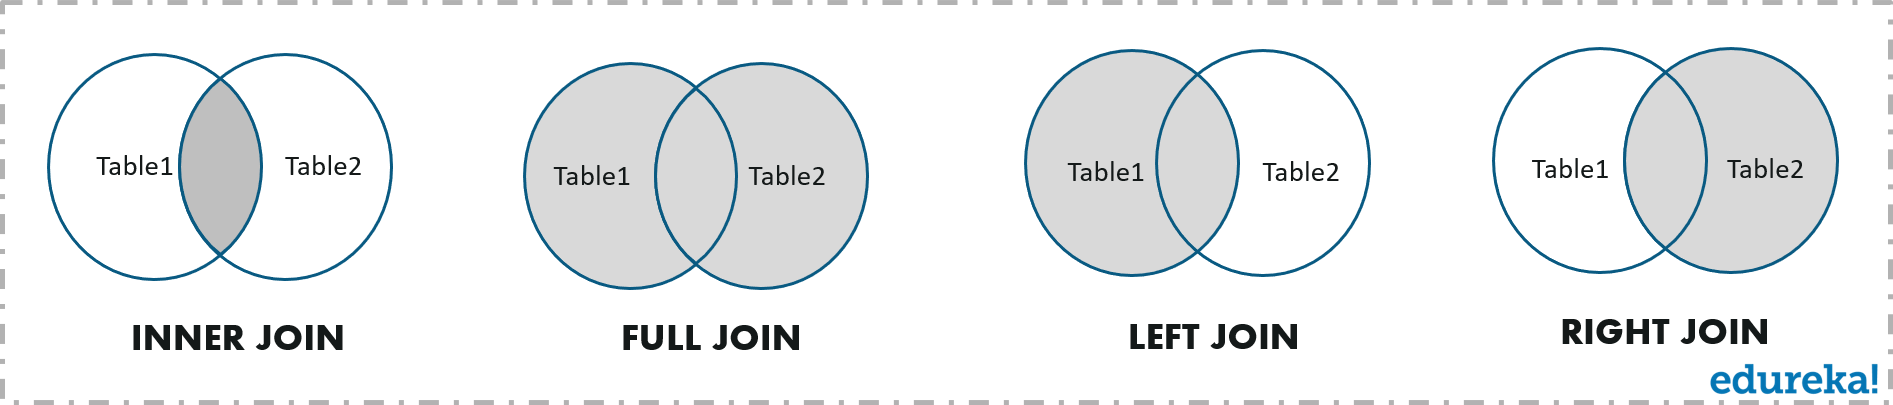

In [5]:
df_01.merge(df_02)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


## **Inner Join**

In [6]:
# Inner Join
df_01.merge(df_02,how='inner')  # Inner is Default

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [8]:
# Specify Join On Single Column
df_01.merge(df_02,how='inner',on='FellowshipID')  

# Note: FirstName columns has been repeated twice

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [9]:
# Specify Join On Single Column
df_01.merge(df_02,how='inner',on=['FellowshipID','FirstName'])  

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


## **Outer Join**

In [7]:
# Outer Join
df_01.merge(df_02,how='outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


## **Left Join**

In [10]:
df_01.merge(df_02,how='left')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


## **Right Join**

In [11]:
df_01.merge(df_02,how='right')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


## **Cross Join**

In [12]:
df_01.merge(df_02,how='cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


# **Join Function**

In [13]:
# Default Settings
df_01.join(df_02)

ValueError: columns overlap but no suffix specified: Index(['FellowshipID', 'FirstName'], dtype='object')

In [14]:
df_01.join(df_02,on='FellowshipID')

ValueError: columns overlap but no suffix specified: Index(['FellowshipID', 'FirstName'], dtype='object')

In [15]:
df_01.join(df_02,on='FellowshipID',how='inner')

ValueError: columns overlap but no suffix specified: Index(['FellowshipID', 'FirstName'], dtype='object')

In [18]:
df_01.join(df_02,on='FellowshipID',how='outer',lsuffix='_Left',rsuffix='_Right')

,FellowshipID,FellowshipID_Left,FirstName_Left,Skills,FellowshipID_Right,FirstName_Right,Age
0.0,1001,1001.0,Frodo,Hiding,NaN,NaN,NaN
1.0,1002,1002.0,Samwise,Gardening,NaN,NaN,NaN
2.0,1003,1003.0,Gandalf,Spells,NaN,NaN,NaN
3.0,1004,1004.0,Pippin,Fireworks,NaN,NaN,NaN
NaN,0,NaN,NaN,NaN,1001.0,Frodo,50.0
NaN,1,NaN,NaN,NaN,1002.0,Samwise,39.0
NaN,2,NaN,NaN,NaN,1006.0,Legolas,2931.0
NaN,3,NaN,NaN,NaN,1007.0,Elrond,6520.0
NaN,4,NaN,NaN,NaN,1008.0,Barromir,51.0


In [21]:
# Join Function Is More Suitable While Working With Index
df_04 = df_01.set_index('FellowshipID').join(df_02,on='FellowshipID',how='outer',lsuffix='_Left',rsuffix='_Right')
df_04

,FirstName_Left,Skills,FellowshipID,FirstName_Right,Age
1001.0,Frodo,Hiding,1001,NaN,NaN
1002.0,Samwise,Gardening,1002,NaN,NaN
1003.0,Gandalf,Spells,1003,NaN,NaN
1004.0,Pippin,Fireworks,1004,NaN,NaN
NaN,NaN,NaN,1001,Frodo,50.0
NaN,NaN,NaN,1002,Samwise,39.0
NaN,NaN,NaN,1006,Legolas,2931.0
NaN,NaN,NaN,1007,Elrond,6520.0
NaN,NaN,NaN,1008,Barromir,51.0


# **Concatenate Function**

## **Concatenate Along Rows**

In [23]:
# Concatenate Along Rows (Default)
pd.concat([df_01,df_02])

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [24]:
pd.concat([df_01,df_02],axis=0)

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [26]:
pd.concat([df_01,df_02],axis=0,join='inner') # Select Only The Common Columns

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [27]:
pd.concat([df_01,df_02],axis=0,join='outer') # Select Only The Common Columns

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


## **Concatenate Along Columns**

In [25]:
# Concatenate Along Columns
pd.concat([df_01,df_02],axis=1)

,FellowshipID,FirstName,Skills,FellowshipID,FirstName,Age
0,1001.0,Frodo,Hiding,1001,Frodo,50
1,1002.0,Samwise,Gardening,1002,Samwise,39
2,1003.0,Gandalf,Spells,1006,Legolas,2931
3,1004.0,Pippin,Fireworks,1007,Elrond,6520
4,NaN,NaN,NaN,1008,Barromir,51


# **Append Function**

In [28]:
df_01.append(df_02)  # Function Deprecated

AttributeError: 'DataFrame' object has no attribute 'append'